In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

In [3]:
start = datetime.datetime(2022,1,1)
end=datetime.datetime(2022,4,17)

In [4]:
google=web.DataReader('GOOGL','yahoo',start,end)

In [5]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,2933.969971,2897.040039,2921.000000,2897.040039,906800,2897.040039
2022-01-03,2917.020020,2874.260010,2901.100098,2899.830078,1432300,2899.830078
2022-01-04,2929.699951,2874.330078,2907.919922,2887.989990,1420000,2887.989990
2022-01-05,2889.989990,2753.760010,2888.399902,2755.500000,2730900,2755.500000
2022-01-06,2798.800049,2731.169922,2739.969971,2754.949951,1867400,2754.949951


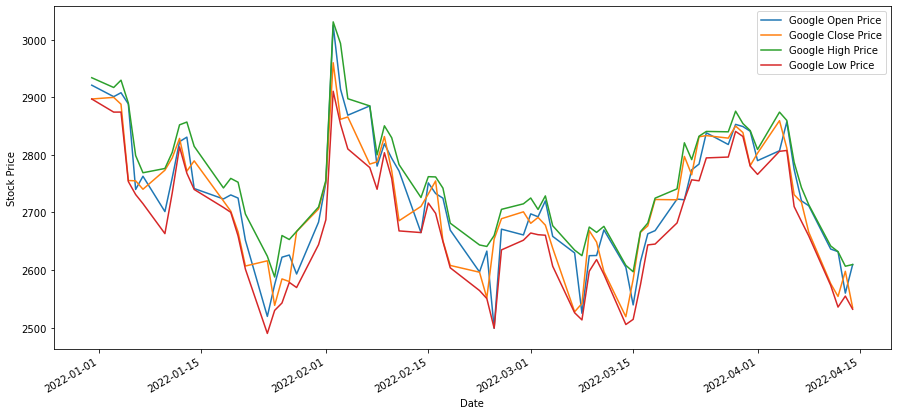

In [9]:
google["Open"].plot(label='Google Open Price',figsize=(15,7))
google['Close'].plot(label='Google Close Price')
google["High"].plot(label='Google High Price')
google["Low"].plot(label='Google Low Price')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

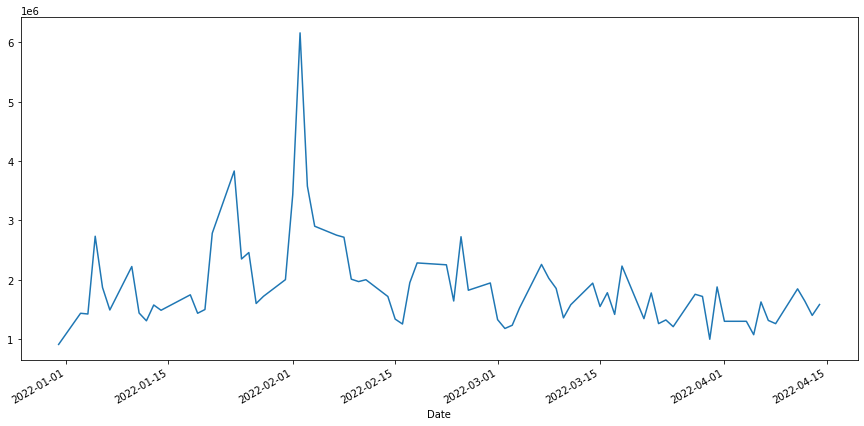

In [11]:
google['Volume'].plot(figsize=(15,7))

## Tesla & Ford & GM stock

In [4]:
start=datetime.datetime(2017,1,1)
end=datetime.datetime(2022,1,1)

In [5]:
tesla=web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader('F','yahoo',start,end)
gm=web.DataReader('GM','yahoo',start,end)

## Opening Price

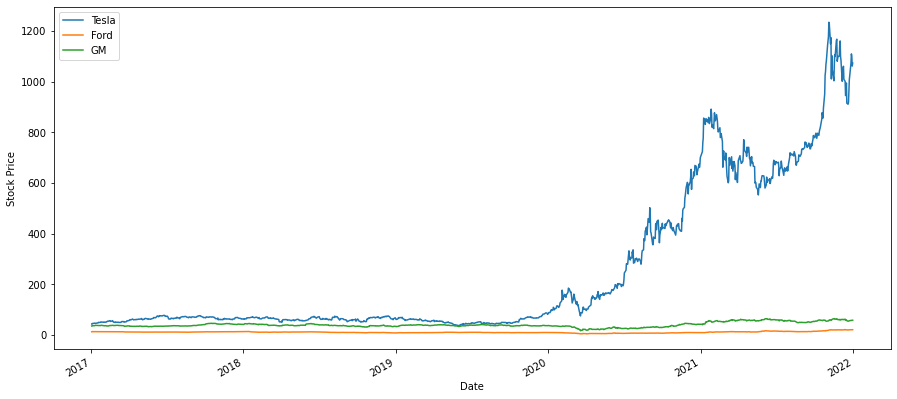

In [6]:
tesla['Open'].plot(label='Tesla',figsize=(15,7))
ford['Open'].plot(label='Ford')
gm['Open'].plot(label="GM")
plt.ylabel('Stock Price')
plt.legend()

## Volume Traded

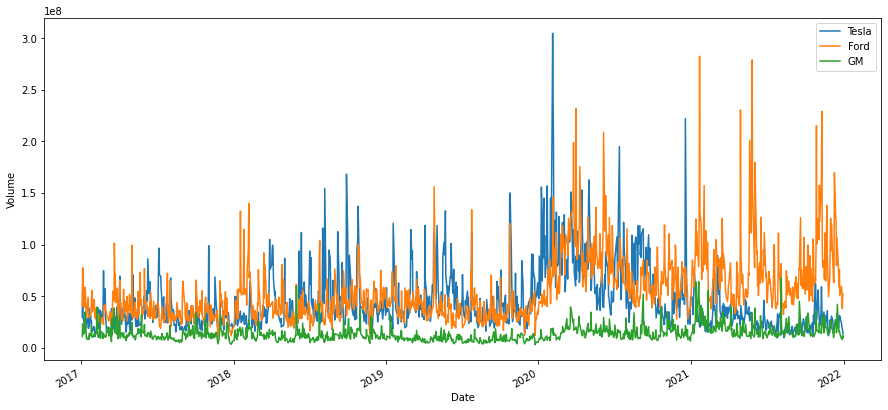

In [7]:
tesla['Volume'].plot(label='Tesla',figsize=(15,7))
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label="GM")
plt.ylabel('Volume')
plt.legend()

<AxesSubplot:xlabel='Date'>

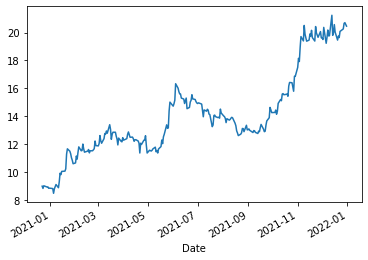

In [29]:
ford.iloc[1000:1259]['Open'].plot()

<AxesSubplot:xlabel='Date'>

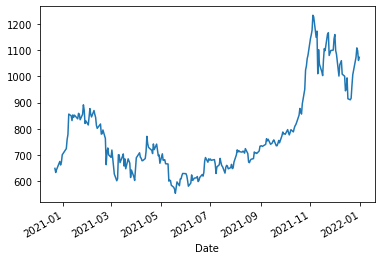

In [30]:
tesla.iloc[1000:1259]['Open'].plot()

## Market Cap

In [8]:
tesla['Total Traded']=tesla['Open'] * tesla['Volume']
ford['Total Traded']=ford['Open'] * ford['Volume']
gm['Total Traded']=gm['Open'] * gm['Volume']

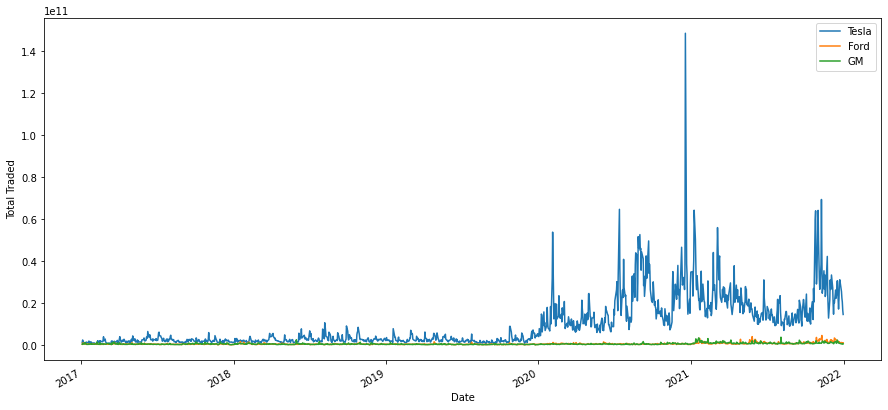

In [9]:
tesla['Total Traded'].plot(label='Tesla',figsize=(15,7))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label="GM")
plt.ylabel('Total Traded')
plt.legend()

In [10]:
tesla['Total Traded'].argmax()

998

## Moving Average

<AxesSubplot:xlabel='Date'>

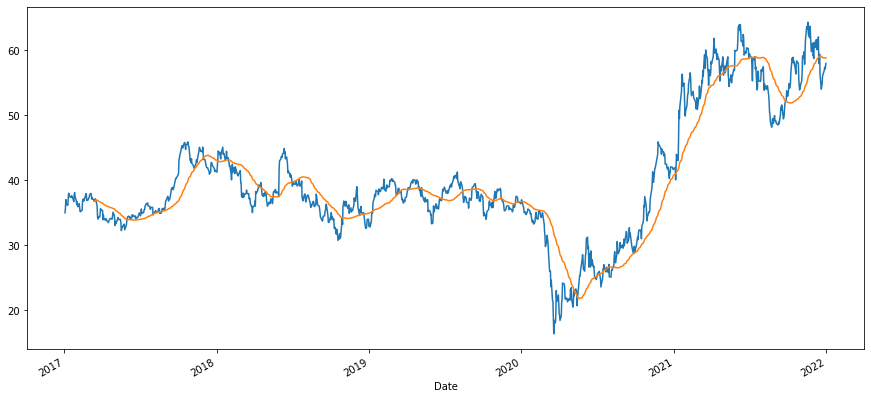

In [11]:
gm['Open'].plot(figsize=(15,7))
gm['MA50']=gm['Open'].rolling(50).mean()
gm['MA50'].plot()

## Scatter_matrix and Correlation 

In [12]:
from pandas.plotting import scatter_matrix
import pandas as pd

In [13]:
car_comp=pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)
car_comp.columns=['Tesla Open','Gm Open','Ford Open']

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Gm Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Gm Open'>,
        <AxesSubplot:xlabel='Gm Open', ylabel='Gm Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Gm Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Gm Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>]],
      dtype=object)

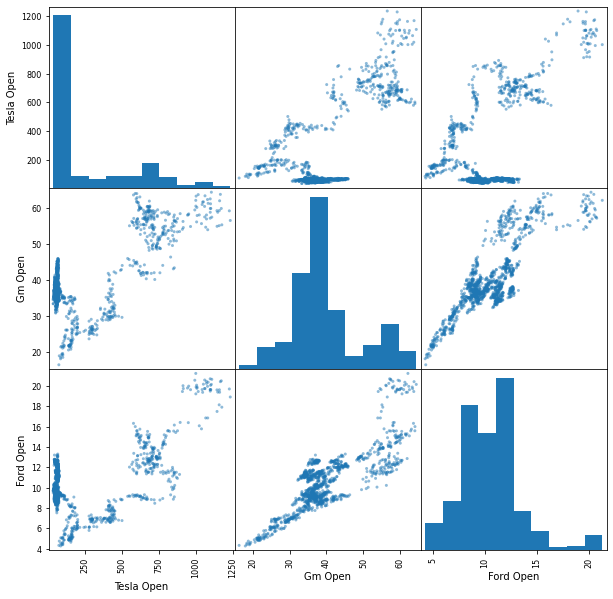

In [14]:
scatter_matrix(car_comp,figsize=(10,10))

## Candelstick Charts

In [47]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


In [50]:
from mpl_finance import candlestick_ohlc

## Daily Percentage Change

In [ ]:
Rt=Pt/Pt-1   - 1

In [15]:
tesla['return']=(tesla['Close']/tesla['Close'].shift(1))-1

In [16]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,return
Date,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,1.272680e+09,NaN
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,2.408099e+09,0.046085
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,1.338527e+09,-0.001057
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,1.254446e+09,0.009967
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,9.111861e+08,0.009912


In [18]:
ford['return']=(ford['Close']/ford['Close'].shift(1))-1

In [21]:
gm['return']=(gm['Close']/gm['Close'].shift(1))-1

## Volatility

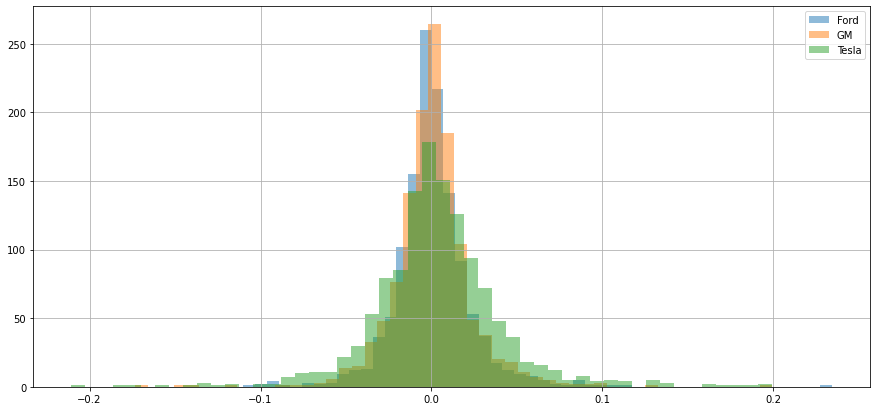

In [25]:
ford['return'].hist(label='Ford',bins=50,figsize=(15,7),alpha=0.5)
gm['return'].hist(bins=50,label='GM',alpha=0.5)
tesla['return'].hist(bins=50,label='Tesla',alpha=0.5)
plt.legend()

- Ford and GM is the same and have higher volatility than Tesla
- A normal distribution

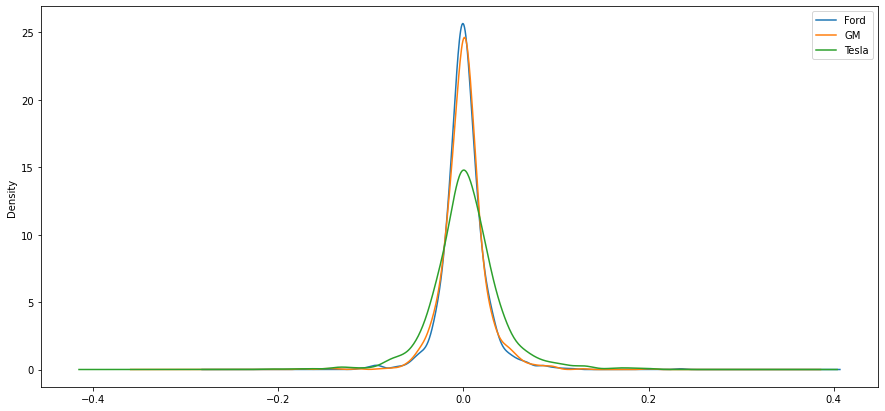

In [28]:
ford['return'].plot(kind='kde',label='Ford',figsize=(15,7))
gm['return'].plot(kind='kde',label='GM')
tesla['return'].plot(kind='kde',label='Tesla')
plt.legend()

- Kernel Density Function 

## BoxPlot

<AxesSubplot:>

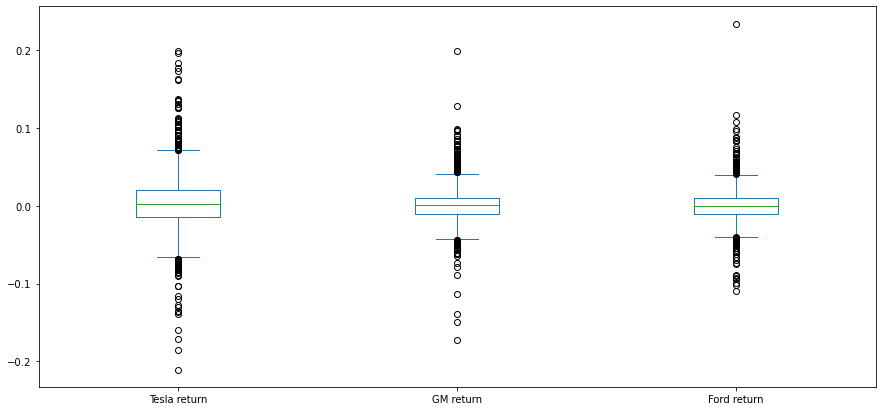

In [35]:
box_df=pd.concat([tesla['return'],gm['return'],ford['return']],axis=1)
box_df.columns=['Tesla return','GM return','Ford return']
box_df.plot(kind='box',figsize=(15,7))

- Tesla return is spread out -> over period time, Tesla is more volatitlity than GM and Ford

array([[<AxesSubplot:xlabel='Tesla return', ylabel='Tesla return'>,
        <AxesSubplot:xlabel='GM return', ylabel='Tesla return'>,
        <AxesSubplot:xlabel='Ford return', ylabel='Tesla return'>],
       [<AxesSubplot:xlabel='Tesla return', ylabel='GM return'>,
        <AxesSubplot:xlabel='GM return', ylabel='GM return'>,
        <AxesSubplot:xlabel='Ford return', ylabel='GM return'>],
       [<AxesSubplot:xlabel='Tesla return', ylabel='Ford return'>,
        <AxesSubplot:xlabel='GM return', ylabel='Ford return'>,
        <AxesSubplot:xlabel='Ford return', ylabel='Ford return'>]],
      dtype=object)

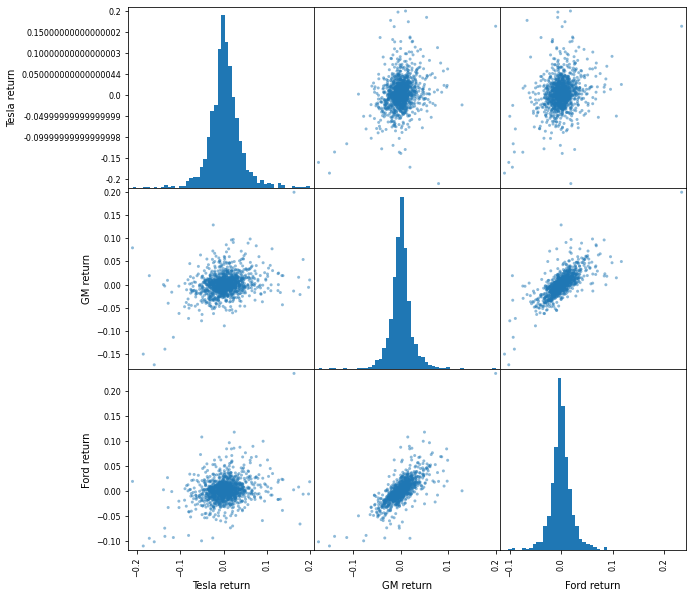

In [37]:
scatter_matrix(box_df,figsize=(10,10), hist_kwds={'bins':50})

## Cumulative Return  
The cumulative return is the total change in the investment price over a set time—an aggregate return, not an annualized one.

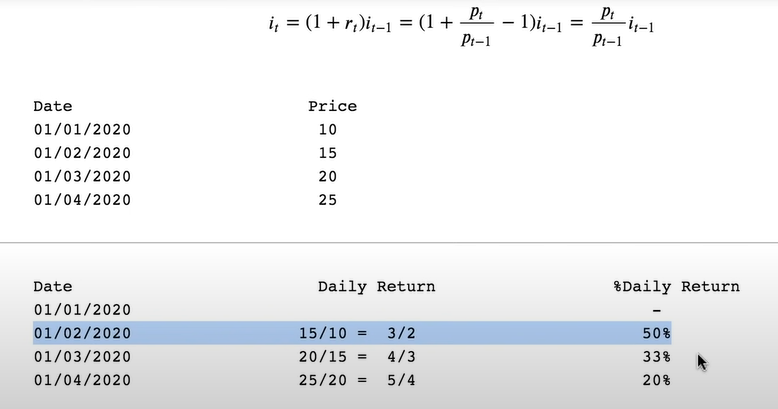

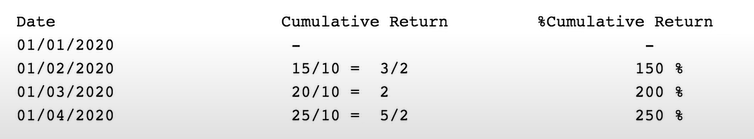

In [38]:
tesla['Cumulative Return']=(1+tesla['return']).cumprod()

In [39]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,return,Cumulative Return
Date,,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,1.272680e+09,NaN,NaN
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,2.408099e+09,0.046085,1.046085
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,1.338527e+09,-0.001057,1.044979
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,1.254446e+09,0.009967,1.055394
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,9.111861e+08,0.009912,1.065856


In [40]:
ford['Cumulative Return']=(1+ford['return']).cumprod()
gm['Cumulative Return']=(1+gm['return']).cumprod()

Text(0, 0.5, 'Cumulative Return')

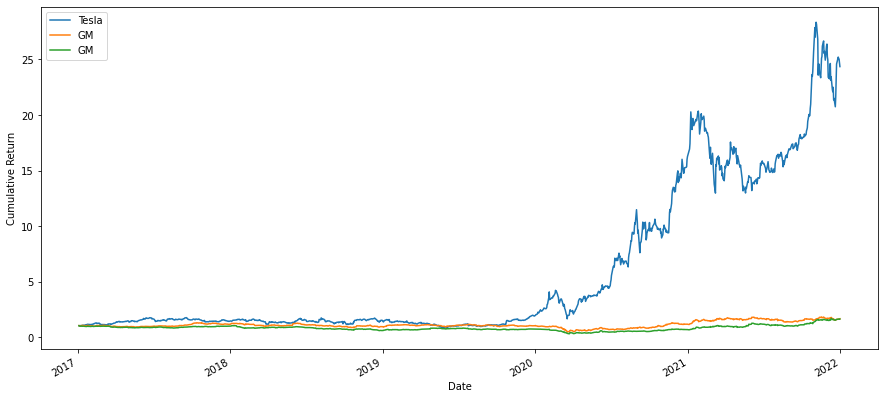

In [41]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(15,7))
gm['Cumulative Return'].plot(label='GM')
ford['Cumulative Return'].plot(label='Ford')
plt.legend()
plt.ylabel('Cumulative Return')